# Convex Hull Implementation
## Grace Claudia - 13520078
---

### Import _library_ yang dibutuhkan

In [171]:
#import library yg dibutuhkan 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### input _dataset_ dan kolom yang akan digunakan untuk visualisasi

In [172]:
# title untuk plot datasset 
title = ["Iris Classification Dataset", "Breast Cancer Wisconsin Classification Dataset", "Wine Classification Dataset"]
# memilih dataset yang akan digunakan
print("Choose Dataset:\n1. Iris dataset (classification)\n2. Breast Cancer Wisconsin (regression)\n3. Wine Dataset (classification)\n")
num = int(input("Masukkan dataset yang akan diuji: "))
# pengecekan apakah dataset yang dipilih ada, jika tidak ada user akan diminta menginput kembali
while num > 3 or num < 1:
    print("Masukan dataset salah")
    num = int(input("Masukkan dataset yang akan diuji: "))
if num == 1:
    data = datasets.load_iris()
elif num == 2:
    data = datasets.load_breast_cancer()
elif num == 3:
    data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)


Choose Dataset:
1. Iris dataset (classification)
2. Breast Cancer Wisconsin (regression)
3. Wine Dataset (classification)



### _Print_ seluruh nama kolom yang ada dan memilih 2 kolom yang akan di plot

In [173]:
print("Kolom", title[num-1])
for i in range(len(df.columns)-1):
    print(str(i+1)+". "+str(df.columns[i]))
column1 = int(input("kolom 1: "))
column2 = int(input("kolom 2: "))
# apabila index kolom yang dipilih tidak ada, atau kolom1 dan kolom 2 sama, user akan diminta menginput kembali
while column1 > len(df.columns)-1 or column1 < 1 or column2 > len(df.columns)-1 or column2 < 1 or column1 == column2:
    print("Masukan kolom diluar index atau kolom 1 dan kolom 2 tidak boleh sama")
    column1 = int(input("kolom 1: "))
    column2 = int(input("kolom 2: "))

Kolom Wine Classification Dataset
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline


### Implementasi fungsi _Helper_ 

In [174]:
import math
def leftMost(points): 
    # mencari titik dengan x terkecil
    # input: array of points
    # output: left most point
    xMin = points[0][0]
    leftMostIndex = 0
    # mengiterasi points untuk mendapatkan x paling kecil
    for i in range (1,len(points)):
        if points[i][0] < xMin:
            xMin = points[i][0]
            leftMostIndex = i
    return points[leftMostIndex]

def rightMost(points): 
    # mencari titik dengan x terbesar
    # input: array of points
    # output: right most point
    xMax = points[0][0]
    rightMostIndex = 0
    # mengiterasi points untuk mendapatkan x paling besar
    for i in range (1,len(points)):
        if points[i][0] > xMax:
            xMax = points[i][0]
            rightMostIndex = i
    return points[rightMostIndex]

def position(point, p1, p2):   
    # menetukan apakah titik point berada diatas atau dibawah garis p1 dan p2
    # input: titik yang diuji (point), titik pembentuk garis(p1 dan p2)
    # output: jika hasil <= 0 maka letak titik diatas garis, jika hasil > 0 maka letak titik dibawah garis
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    xA = point[0]
    yA = point[1]
    # Vector 1
    v1 = (x2-x1, y2-y1)  
    # Vector 2 
    v2 = (x2-xA, y2-yA)  
    # Cross product
    xp = v1[0]*v2[1] - v1[1]*v2[0] 
    return round(xp,10)

def mostDistancePoint(points, p1, p2):
    # mencari titik dengan jarak terjauh dari garis
    # input: titik-titik kandidat (points), titik pembentuk garis(p1 dan p2)
    # output: titik dengan jarak terjauh dari garis
    if len(points)==0:
        return None
    else:
        # mencari persamaan garis
        x1 = p1[0]
        y1 = p1[1]
        x2 = p2[0]
        y2 = p2[1]
        # mencari koefisien yaitu a, b, c dari ax + by + c = 0 
        a = y2 - y1
        b = x1 - x2
        c = x2*y1 - x1*y2
        maxDistance = -999
        maxDistanceIndex = 0
        for i in range (len(points)):
            #cari dengan rumus d = |ax + by + c|/sqrt(a^2 + b^2)
            distanceNow = abs(a*points[i][0] + b*points[i][1] + c)/math.sqrt(a**2 + b**2)
            if  distanceNow > maxDistance:
                maxDistance = distanceNow
                maxDistanceIndex = i
        return points[maxDistanceIndex]


### Implementasi algoritma convex hull dengan konsep _divide and conquer_

In [175]:
def myConvexHull(points, a = None, b = None, direction = None):
    # mencari convex hull dari titik-titik yang ada
    # input: titik-titik kandidat (points), titik pembentuk garis(p1 dan p2), arah (direction)
    # output: convex hull dari titik-titik kandidat
    if len(points)==0:
        #apabila titik kandidat kosong, maka return kosong
        return []
    if direction == None:
        # apabila arah tidak ditentukan, maka arah rekursif akan terbagi menjadi arah atas dan bawah 
        up = []
        down = []
        # a merupakan titik paling kiri, sedangkah b merupakan titik paling kanan
        a = leftMost(points)
        b = rightMost(points)
        for i in range (len(points)):
            # mengecek letak titik 
            if (points[i] != a and points[i] != b):
                pos = position(points[i],a,b)
                # apabila hasil pengecekann <= 0 maka letak titik merupakan di kiri/atas garis, sedangkan jika > 0 maka di kanan garis
                if pos <= 0:
                    up += [points[i]]
                elif pos > 0:
                    down += [points[i]]
        # pengecekan masing-masin guntuk arah atas dan bawah secara rekursif
        return [a] + myConvexHull(up, a, b ,1) + [b] + myConvexHull(down, a, b, -1)[::-1]
    else:
        # jika arah merupakan 1 pengecekan dilakukan ke atas, jika -1 pengecekan dilakukan ke bawah
        if (direction == 1):
            up = []

            # mengecek posisi titik terhadap garis 
            for i in range (len(points)):
                if (points[i] != a and points[i] != b):
                    if position(points[i],a, b) <= 0:
                        # menambahkan titik yang berada di atas garis ke array pengecekan
                        up += [points[i]]

            # mencari titik terjauh dari garis yang melewati a dan b
            furthestPoint = mostDistancePoint(up, a, b)

            # pengecekan dilanjutkan ke atas
            return [a] + myConvexHull(up, a, furthestPoint, 1) +  myConvexHull(up, furthestPoint, b, 1) + [b] 
            
        elif (direction == -1):
            down = []

            # mengecek posisi titik terhadap garis 

            for i in range (len(points)):
                # mengecek determinan
                if (points[i] != a and points[i] != b):
                    if position(points[i], a, b) > 0:
                        # menambahkan titik yang berada di bawah garis ke array pengecekan
                        down += [points[i]]

            # mencari titik terjauh dari garis yang melewati a dan b
            furthestPoint = mostDistancePoint(down,a, b)
            
            # pengecekan dilanjutkan ke bawah
            return [a] + myConvexHull(down, a, furthestPoint, -1) +  myConvexHull(down, furthestPoint, b, -1) + [b] 


### Program visualisasi utama

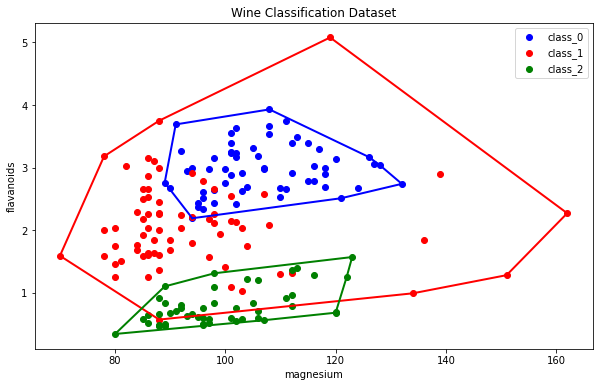

In [176]:
plt.figure(figsize = (10, 6))
colors = ['blue','red','green','yellow','orange','black','brown','purple','pink','gray','cyan']
plt.title("Convex Hull of",title[num-1])
plt.xlabel(data.feature_names[column1-1])
plt.ylabel(data.feature_names[column2-1])

for j in range(len(data.target_names)):
    bucket = df[df['Target'] == j]
    buckets = bucket.iloc[:,[column1-1,column2-1]].values
    # changing from numpy array to list of points
    result = tuple(map(tuple, buckets))
    # menggunakan fungsi myConvexHull
    hull = myConvexHull(result)
    # plotting convex hull
    plt.scatter([p[0] for p in buckets], [p[1] for p in buckets], label=data.target_names[j], color=colors[j])
    plt.legend()
    for i in range(len(hull)-1):
        x = [hull[i][0], hull[i+1][0]]
        y = [hull[i][1], hull[i+1][1]]
        plt.plot(x, y, colors[j], linewidth=2, linestyle='-')